In [1]:
!pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.CAMVID_TINY)

In [3]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.040826,2.497888,00:57


epoch,train_loss,valid_loss,time
0,2.064857,1.587538,01:01
1,1.709234,1.382792,01:01
2,1.503192,1.217626,01:01
3,1.349088,0.963443,00:59
4,1.218804,0.885276,01:01
5,1.099643,0.810302,00:59
6,1.000539,0.796227,01:00
7,0.922091,0.786649,01:07


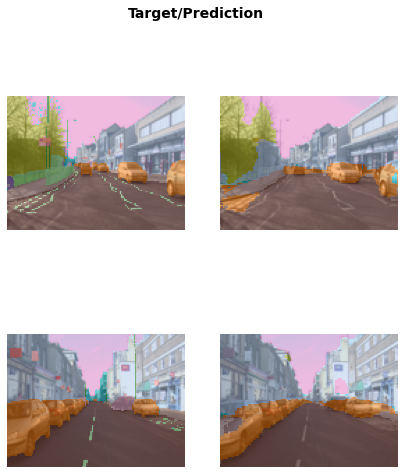

In [4]:
learn.show_results(max_n=6, figsize=(7,8))